In [50]:
import pandas as pd
import numpy as np

#import plotting libraries 
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline


In [51]:
import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set(font_scale=1.5)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


In [54]:
df_train = pd.read_csv('train.csv')

In [55]:
df_train.shape

(891, 12)

In [56]:
#See distinct values in Sex columns
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [57]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [58]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [59]:
#checking for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
# drop irrelevant columns

df_train = df_train.drop(['PassengerId','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [62]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age
        

In [63]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [64]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx,axis = 1)

In [65]:
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [66]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [67]:
df_train_dummied = pd.get_dummies(df_train, columns=['Sex'])

In [68]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=['Embarked'])

In [69]:
df_train_dummied 

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,0,1,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,1,0,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,23.4500,1,0,0,0,1
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,0,1,1,0,0


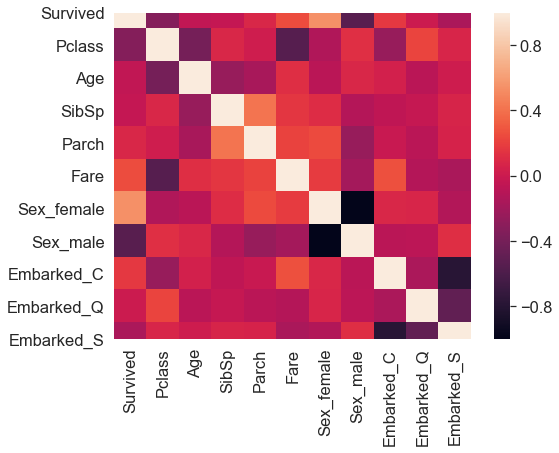

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train_dummied.corr())

In [74]:
used_features = ['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']

In [75]:
X = df_train_dummied[used_features].values

In [76]:
y = df_train_dummied['Survived']

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =11)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [82]:
#Initiate the classifier

LogReg = LogisticRegression()

In [83]:
LogReg.fit(X_train,y_train)

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
y_pred = LogReg.predict(X_test)

In [85]:
metrics.confusion_matrix(y_test,y_pred)

array([[143,  18],
       [ 23,  83]], dtype=int64)

In [86]:
metrics.accuracy_score(y_test,y_pred)

0.846441947565543

In [87]:
len(X_test)

267

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       161
           1       0.82      0.78      0.80       106

    accuracy                           0.85       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267



In [89]:
LogReg.coef_

array([[-1.04235236, -0.03066349, -0.22601304, -0.12982814,  2.07285002,
        -0.25356755,  0.82751581,  0.67729244,  0.31447422]])

In [91]:
LogReg.intercept_

array([1.81928247])

In [92]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [93]:
LogReg.predict_proba(X_test)

array([[0.35251045, 0.64748955],
       [0.91301049, 0.08698951],
       [0.57363862, 0.42636138],
       [0.46958577, 0.53041423],
       [0.83723172, 0.16276828],
       [0.83054803, 0.16945197],
       [0.54128894, 0.45871106],
       [0.15240052, 0.84759948],
       [0.08685495, 0.91314505],
       [0.83479147, 0.16520853],
       [0.55909161, 0.44090839],
       [0.86169908, 0.13830092],
       [0.83479147, 0.16520853],
       [0.17927036, 0.82072964],
       [0.24367443, 0.75632557],
       [0.83939467, 0.16060533],
       [0.86365518, 0.13634482],
       [0.59790277, 0.40209723],
       [0.09541019, 0.90458981],
       [0.90274464, 0.09725536],
       [0.43856382, 0.56143618],
       [0.62421408, 0.37578592],
       [0.86884686, 0.13115314],
       [0.80351711, 0.19648289],
       [0.87897844, 0.12102156],
       [0.89402916, 0.10597084],
       [0.87897844, 0.12102156],
       [0.51284827, 0.48715173],
       [0.71295429, 0.28704571],
       [0.92620386, 0.07379614],
       [0.